In [219]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import f1_score,make_scorer,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('./emails.csv').drop('Email No.',axis=1)
target = df['Prediction'].values
data = df.drop('Prediction',axis=1)

data.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [220]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.3)

In [221]:
randomForest = RandomForestClassifier(random_state=42)

### F1 cross validation score

In [222]:
scorer = make_scorer(f1_score)
cv_f1_score = cross_val_score(randomForest,x_train,y_train,cv=3,scoring=scorer)
cv_accuracy_score = cross_val_score(randomForest,x_train,y_train,cv=3)
print(f'Media do F1 score: {cv_f1_score.mean()}\nMédia do Accuracy_score: {cv_accuracy_score.mean()}')

Media do F1 score: 0.9347130521881527
Média do Accuracy_score: 0.9629838014200378


### F1 without cross validation score

In [223]:
from sklearn.metrics import accuracy_score

randomForest.fit(x_train,y_train)
y_pred = randomForest.predict(x_test)

f_score = f1_score(y_true=y_test,y_pred=y_pred)
acc_score = accuracy_score(y_true=y_test,y_pred=y_pred)

print(f'F1 score: {f_score}\nAccuracy_score: {acc_score}')

F1 score: 0.9519650655021834
Accuracy_score: 0.9716494845360825


### Confusion Matrix Visualization

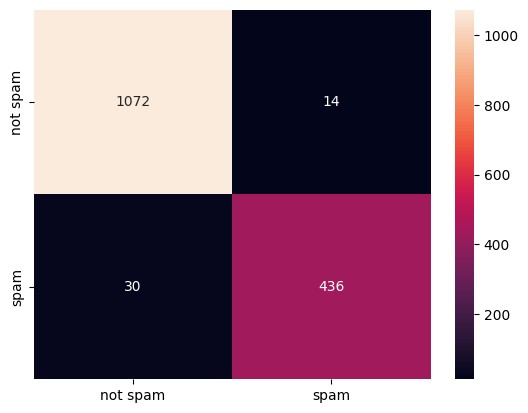

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred) # y_pred = predict do random forest sem Cross validation
sns.heatmap(cm,annot=True, yticklabels=['not spam','spam'], xticklabels=['not spam','spam'],fmt='g')
plt.show()

### Relatorio de classicação

In [225]:
relatorio = classification_report(y_test,y_pred)
print(relatorio)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1086
           1       0.97      0.94      0.95       466

    accuracy                           0.97      1552
   macro avg       0.97      0.96      0.97      1552
weighted avg       0.97      0.97      0.97      1552

